In [1]:
# Import libraries and load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
missing=df.isnull().sum()
print(missing)

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


In [ ]:
# Preprocessing: split features/target, train/test split, scaling
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train Decision Tree and Random Forest classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

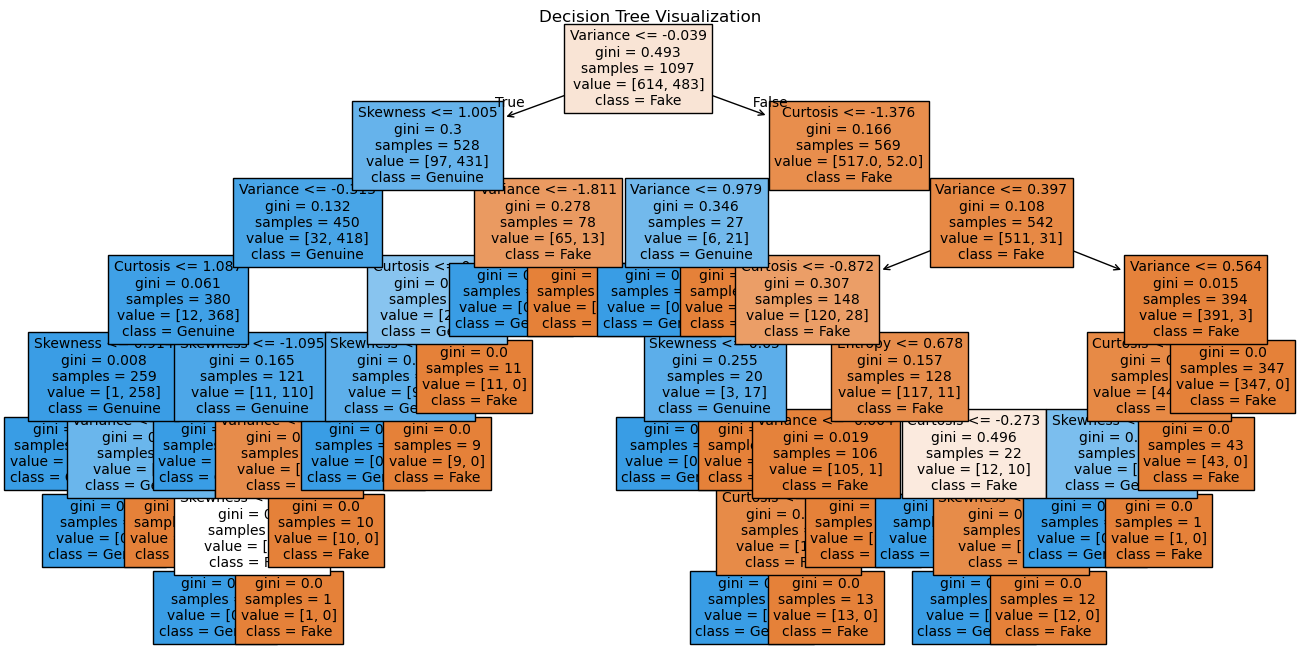

In [4]:
# Visualize the trained Decision Tree
plt.figure(figsize=(16,8))
plot_tree(dt_clf, feature_names=X.columns, class_names=['Fake','Genuine'], filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

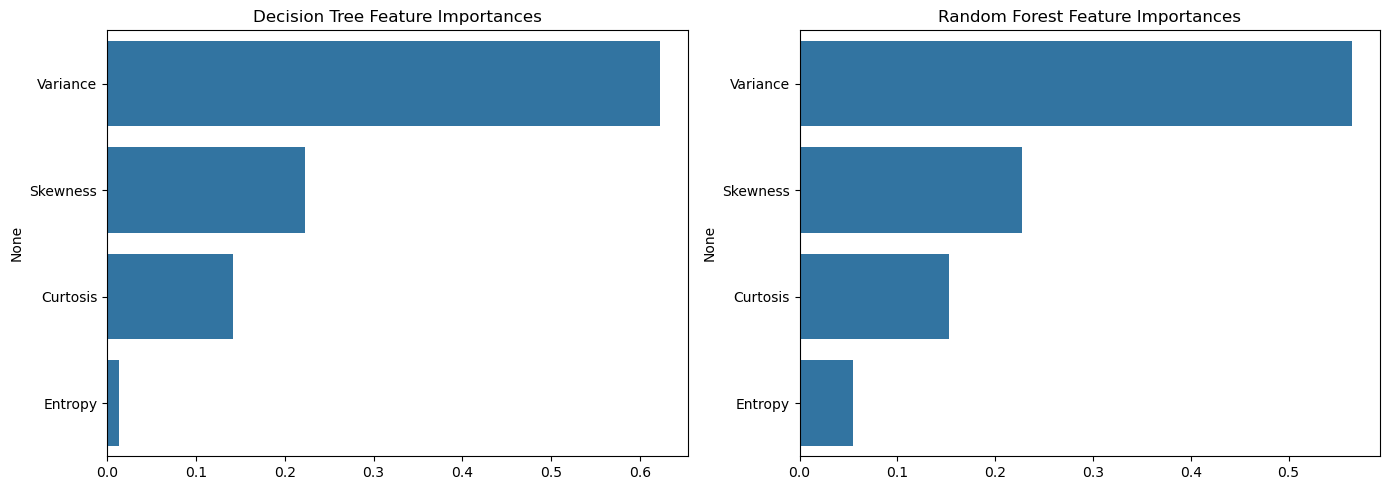

In [5]:
# Visualize feature importances for both models
import numpy as np

features = X.columns

dt_importances = dt_clf.feature_importances_
rf_importances = rf_clf.feature_importances_

fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x=dt_importances, y=features, ax=ax[0])
ax[0].set_title('Decision Tree Feature Importances')
sns.barplot(x=rf_importances, y=features, ax=ax[1])
ax[1].set_title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
dt_acc = dt_clf.score(X_test_scaled, y_test)
rf_acc = rf_clf.score(X_test_scaled, y_test)
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Decision Tree Accuracy: 0.98
Random Forest Accuracy: 0.99
